In [5]:
# Load Data
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
PATH = 'C:/RecoSys/Data/'
r_cols = ['user_id','movie_id','rating','timestamp']
ratings = pd.read_csv(PATH+'u.data', sep='\t', names=r_cols, encoding='latin-1')
ratings = ratings[['user_id', 'movie_id', 'rating']].astype(int)

ratings_train, ratings_test = train_test_split(ratings, train_size=0.75, shuffle=True)
print(ratings_train.shape, ratings_test.shape)

(75000, 3) (25000, 3)


In [12]:
#### (1)
# SVD(MF) using DL
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, Dot, Add, Flatten
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import SGD, Adamax

# Variable 초기화
K = 200                     # latent factor 수
mu = ratings_train.rating.mean()   # 전체 평균
M = ratings.user_id.max()+1 # Number of users
N = ratings.movie_id.max()+1# Number of items

# Defining RMSE measure
def RMSE(y_true, y_pred):
    return tf.sqrt(tf.reduce_mean(tf.square(y_true-y_pred)))

# Keras Model
user = Input(shape=(1,))
item = Input(shape=(1,))
P_embedding = Embedding(M, K, embeddings_regularizer=l2())(user) # P: [M, K]
user_bias = Embedding(M, 1, embeddings_regularizer=l2())(user) # user bias: [M, 1]

Q_embedding = Embedding(N, K, embeddings_regularizer=l2())(item) # Q: [N, K]
item_bias = Embedding(N, 1, embeddings_regularizer=l2())(item) # item bias: [N, 1]

R = layers.dot([P_embedding, Q_embedding], axes=2)
R = layers.add([R, user_bias, item_bias])
R = Flatten()(R)

In [13]:
# Model Setting
model = Model(inputs = [user, item], outputs = R)
model.compile(
    loss = RMSE,
    optimizer=SGD(),
    metrics=[RMSE]
)
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            [(None, 1)]          0                                            
__________________________________________________________________________________________________
input_6 (InputLayer)            [(None, 1)]          0                                            
__________________________________________________________________________________________________
embedding_8 (Embedding)         (None, 1, 200)       188800      input_5[0][0]                    
__________________________________________________________________________________________________
embedding_10 (Embedding)        (None, 1, 200)       336600      input_6[0][0]                    
____________________________________________________________________________________________

In [16]:
# Model Fitting
result = model.fit(
    x = [ratings_train.user_id.values, ratings_train.movie_id.values],
    y = ratings_train.rating.values - mu,
    epochs = 60,
    batch_size=256,
    validation_data=(
        [ratings_test.user_id.values, ratings_test.movie_id.values],
        ratings_test.rating.values-mu
    )
)

Train on 75000 samples, validate on 25000 samples
Epoch 1/60
75000/75000 [==============================] - 1s 17us/sample - loss: 5.2790 - RMSE: 1.1253 - val_loss: 5.0415 - val_RMSE: 1.1272
Epoch 2/60
75000/75000 [==============================] - 1s 16us/sample - loss: 4.8175 - RMSE: 1.1233 - val_loss: 4.6063 - val_RMSE: 1.1254
Epoch 3/60
75000/75000 [==============================] - 1s 15us/sample - loss: 4.4069 - RMSE: 1.1212 - val_loss: 4.2198 - val_RMSE: 1.1238
Epoch 4/60
75000/75000 [==============================] - 1s 17us/sample - loss: 4.0418 - RMSE: 1.1194 - val_loss: 3.8759 - val_RMSE: 1.1219
Epoch 5/60
75000/75000 [==============================] - 1s 17us/sample - loss: 3.7172 - RMSE: 1.1177 - val_loss: 3.5700 - val_RMSE: 1.1199
Epoch 6/60
75000/75000 [==============================] - 1s 17us/sample - loss: 3.4285 - RMSE: 1.1161 - val_loss: 3.2983 - val_RMSE: 1.1193
Epoch 7/60
75000/75000 [==============================] - 1s 17us/sample - loss: 3.1717 - RMSE: 1.1146 -

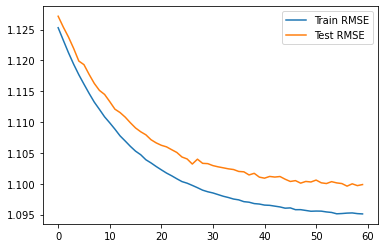

In [17]:
# Plot RMSE
import matplotlib.pyplot as plt
plt.plot(result.history['RMSE'], label="Train RMSE")
plt.plot(result.history['val_RMSE'], label='Test RMSE')
plt.legend()
plt.show()

In [19]:
# Prediction
user_ids = ratings_test.user_id.values[:6]
movie_ids = ratings_test.movie_id.values[:6]
predictions = model.predict([user_ids, movie_ids])+mu
print('Actuals:\n', ratings_test[:6])
print()
print('Predictions:\n', predictions)

Actuals:
        user_id  movie_id  rating
40607      640       720       3
45349       21       564       3
26605        6       321       3
76723      666       546       4
61559       22         4       5
92050      882       407       2

Predictions:
 [[3.5471365]
 [3.455381 ]
 [3.5167508]
 [3.4930294]
 [3.5284672]
 [3.5434947]]


In [ ]:
# RMSE check
def RMSE2(y_true, y_pred):
    return np.sqrt(np.mean((np.array(y_true) - np.array(y_pred))**2))

user_ids = ratings_test.user_id.values
movie_ids = ratings_test.movie_id.values
y_pred = model.predict([user_ids, movie_ids]) + mu
y_pred = np.ravel(y_pred, order='C')
y_true = np.array(ratings_test.rating)

RMSE2(y_true, y_pred)


In [2]:
# Load Data
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
PATH = 'C:/RecoSys/Data/'
r_cols = ['user_id','movie_id','rating','timestamp']
ratings = pd.read_csv(PATH+'u.data', sep='\t', names=r_cols, encoding='latin-1')
ratings = ratings[['user_id', 'movie_id', 'rating']].astype(int)

ratings_train, ratings_test = train_test_split(ratings, train_size=0.75, shuffle=True)
print(ratings_train.shape, ratings_test.shape)

(75000, 3) (25000, 3)


In [3]:
##### (1)

import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, Dot, Add, Flatten
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import SGD, Adam, Adamax

# Variable 초기화 
K = 200                             # Latent factor 수 
mu = ratings_train.rating.mean()    # 전체 평균 
M = ratings.user_id.max() + 1       # Number of users
N = ratings.movie_id.max() + 1      # Number of movies

# Defining RMSE measure
def RMSE(y_true, y_pred):
    return tf.sqrt(tf.reduce_mean(tf.square(y_true - y_pred)))


In [4]:
##### (2)

# Keras model
user = Input(shape=(1, ))                                               # User input
item = Input(shape=(1, ))                                               # Item input
P_embedding = Embedding(M, K, embeddings_regularizer=l2())(user)        # (M, 1, K)
Q_embedding = Embedding(N, K, embeddings_regularizer=l2())(item)        # (N, 1, K)
user_bias = Embedding(M, 1, embeddings_regularizer=l2())(user)          # User bias term (M, 1, )
item_bias = Embedding(N, 1, embeddings_regularizer=l2())(item)          # Item bias term (N, 1, )

# Concatenate layers
from tensorflow.keras.layers import Dense, Concatenate, Activation
P_embedding = Flatten()(P_embedding)                                    # (K, )
Q_embedding = Flatten()(Q_embedding)                                    # (K, )
user_bias = Flatten()(user_bias)                                        # (1, )
item_bias = Flatten()(item_bias)                                        # (1, )
R = Concatenate()([P_embedding, Q_embedding, user_bias, item_bias])     # (2K + 2, )

# Neural network
R = Dense(2048)(R)
R = Activation('linear')(R)
R = Dense(256)(R)
R = Activation('linear')(R)
R = Dense(1)(R)

model = Model(inputs=[user, item], outputs=R)
model.compile(
  loss=RMSE,
  optimizer=SGD(),
  #optimizer=Adamax(),
  metrics=[RMSE]
)
model.summary()

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 1)]          0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, 1)]          0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 1, 200)       188800      input_1[0][0]                    
_____________________________________________________________________________________________

In [5]:
# Model Fitting
result = model.fit(
    x = [ratings_train.user_id.values, ratings_train.movie_id.values],
    y = ratings_train.rating.values - mu,
    epochs = 60,
    batch_size=512,
    validation_data=(
        [ratings_test.user_id.values, ratings_test.movie_id.values],
        ratings_test.rating.values-mu
    )
)

Train on 75000 samples, validate on 25000 samples
Epoch 1/60
75000/75000 [==============================] - 4s 50us/sample - loss: 4.7331 - RMSE: 1.1198 - val_loss: 4.6210 - val_RMSE: 1.1139
Epoch 2/60
75000/75000 [==============================] - 4s 49us/sample - loss: 4.5249 - RMSE: 1.1175 - val_loss: 4.4193 - val_RMSE: 1.1120
Epoch 3/60
75000/75000 [==============================] - 4s 51us/sample - loss: 4.3286 - RMSE: 1.1157 - val_loss: 4.2287 - val_RMSE: 1.1101
Epoch 4/60
75000/75000 [==============================] - 4s 51us/sample - loss: 4.1431 - RMSE: 1.1135 - val_loss: 4.0484 - val_RMSE: 1.1076
Epoch 5/60
75000/75000 [==============================] - 4s 52us/sample - loss: 3.9681 - RMSE: 1.1109 - val_loss: 3.8786 - val_RMSE: 1.1053
Epoch 6/60
75000/75000 [==============================] - 4s 53us/sample - loss: 3.8026 - RMSE: 1.1084 - val_loss: 3.7179 - val_RMSE: 1.1024
Epoch 7/60
75000/75000 [==============================] - 4s 51us/sample - loss: 3.6462 - RMSE: 1.1051 -

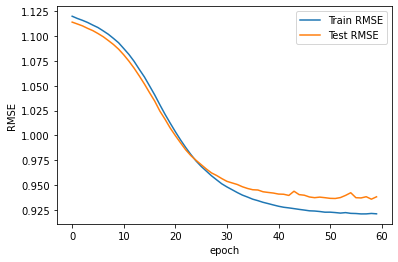

Actuals: 
        user_id  movie_id  rating
30487      552       151       3
30616      405       556       1
62040      615       678       1
23171        1         2       3
49687      450       202       4
85204      168       845       4

Predictions: 
 [[3.33565  ]
 [1.4164922]
 [2.7154036]
 [3.3131702]
 [4.0727644]
 [3.4784148]]


0.9386359172490512

In [6]:
# Plot RMSE
import matplotlib.pyplot as plt
plt.plot(result.history['RMSE'], label="Train RMSE")
plt.plot(result.history['val_RMSE'], label="Test RMSE")
plt.xlabel('epoch')
plt.ylabel('RMSE')
plt.legend()
plt.show()

# Prediction
user_ids = ratings_test.user_id.values[0:6]
movie_ids = ratings_test.movie_id.values[0:6]
predictions = model.predict([user_ids, movie_ids]) + mu
print("Actuals: \n", ratings_test[0:6])
print()
print("Predictions: \n", predictions)

# 정확도(RMSE)를 계산하는 함수 
def RMSE2(y_true, y_pred):
    return np.sqrt(np.mean((np.array(y_true) - np.array(y_pred))**2))

user_ids = ratings_test.user_id.values
movie_ids = ratings_test.movie_id.values
y_pred = model.predict([user_ids, movie_ids]) + mu
y_pred = np.ravel(y_pred, order='C')
y_true = np.array(ratings_test.rating)

RMSE2(y_true, y_pred)
